Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip

Информацию о загрузке изображений и преобразовании их в numnpy-массивы вы можете найти в Базе знаний:


In [2]:
# Ваше решение
import os
from pathlib import Path # Работа с файлами
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Dense,
    Dropout,
    Input,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [3]:
if not os.path.exists("bus"):
    with zipfile.ZipFile("bus.zip", "r") as zip_ref:
        zip_ref.extractall("bus")

In [4]:
base_folder = Path("bus") # Папка с данными

x_all, y_all = [], [] # Списки для хранения изображений и меток
# Считываем изображения и метки
for folder in base_folder.iterdir():
    for filename in folder.iterdir():
        # Загружаем изображение и преобразуем его
        img = image.load_img(filename, target_size=(128, 128), color_mode="grayscale")
        y_all.append(0 if folder.name == "Входящий" else 1)
        img_array = np.array(img).astype("float32") / 255.0
        # Добавляем изображение в список
        x_all.append(img_array.flatten())
x_all = np.array(x_all) # Преобразуем список в массив NumPy
y_all = np.array(y_all) # Преобразуем список меток в массив NumPy

In [5]:
# Разделяем данные на обучающую, валидационную и тестовую выборки
x_train, x_temp, y_train, y_temp = train_test_split(
    x_all, y_all, test_size=0.3, random_state=42, stratify=y_all
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [6]:
drop_rate = 0.3 # Вероятность отсева нейронов
input_shape = 128 * 128 # Размер входного слоя

model = Sequential()

model.add(Input(shape=(input_shape,))) # Входной слой
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0005),
    metrics=["accuracy"],
)


I0000 00:00:1748292931.051969   67235 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [8]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1,
)

Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8238 - loss: 0.3910 - val_accuracy: 0.8282 - val_loss: 0.4098
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8581 - loss: 0.3220 - val_accuracy: 0.6769 - val_loss: 0.6905
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8706 - loss: 0.3006 - val_accuracy: 0.8554 - val_loss: 0.3159
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8999 - loss: 0.2491 - val_accuracy: 0.7783 - val_loss: 0.5455
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8854 - loss: 0.2534 - val_accuracy: 0.8341 - val_loss: 0.4872
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9137 - loss: 0.2112 - val_accuracy: 0.8833 - val_loss: 0.2734
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9201 - loss: 0.1955 - val_accuracy: 0.8649 - val_loss: 0.3389
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9273 - loss: 0.1709 - val_accuracy: 0.

In [9]:
# Оценка модели на тестовой выборке
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(
    f"Точность на обучающей выборке: {history.history['accuracy'][-1] * 100:.2f}%,\n"
    "Точность на валидационной выборке: "
    f"{history.history['val_accuracy'][-1] * 100:.2f}%,\n"
    f"Точность на тестовой выборке: {test_accuracy * 100:.2f}%"
)


Точность на обучающей выборке: 98.27%,
Точность на валидационной выборке: 97.06%,
Точность на тестовой выборке: 96.33%


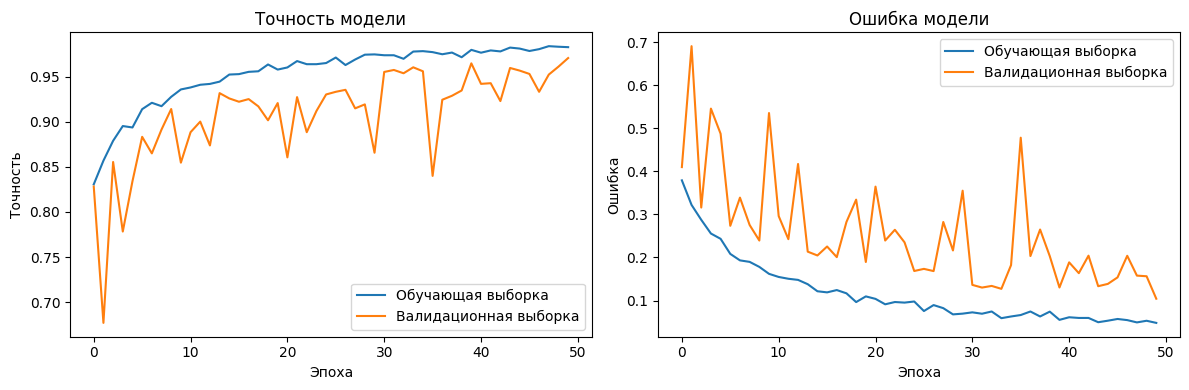

In [10]:
# Построение графиков точности и потерь
plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Обучающая выборка")
plt.plot(history.history["val_accuracy"], label="Валидационная выборка")
plt.title("Точность модели")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()

# График ошибки
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Обучающая выборка")
plt.plot(history.history["val_loss"], label="Валидационная выборка")
plt.title("Ошибка модели")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка")
plt.legend()

plt.tight_layout()
plt.show()
